In [1]:
import os
os.mkdir("train")
os.mkdir("train/positive")
os.mkdir("train/negative")

In [2]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, Activation, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import math
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


from keras.utils import np_utils

In [4]:
# img = cv2.imread("/content/train/positive/S042_001_00000018.png")

In [5]:
# img.shape

In [7]:
# data_path = 'D:/sem_4_project_material/train/'
data_path = '/content/train'

row, col = 48, 48
classes = 2

In [8]:

def count_image(data_path):
    total_images = 0
    for directory in os.listdir(data_path):
        count =0
        for f in os.listdir(data_path + '/'+ directory + '/'):
            count +=1
            total_images +=1
            
        print(f"{directory} has {count} number images")
        
    print(f"Total number images is {total_images}")
    
    return total_images

In [9]:
total_images=count_image(data_path)
total_images

negative has 431 number images
positive has 457 number images
Total number images is 888


888

In [10]:
EMOTIONS = ['negative','positive']

In [11]:
def image_to_array(total_image, path):
    image_array = np.empty(shape=(total_image, 48, 48, 3))
    image_label = np.empty(shape=(total_image))
    img_label = []
    label_to_text= {}
    
    
    i = 0
    e = 0
    
    for directory in os.listdir(path):
#         print(directory)
        if directory in EMOTIONS:
            label_to_text[e] = directory
            
            for f in os.listdir(path + "/"+directory + "/"):
                
                
                img = cv2.imread(path +  "/"+ directory + "/" +f)
                image_array[i] = img
            

                image_label[i]= e
                i +=1
                img_label.append([img,e])

            print(f"All images converted to array of {directory} directory")
            
            e +=1
            
    return image_array, image_label, label_to_text, img_label

In [12]:
train_image_array, train_image_label, train_label_to_text, img_label = image_to_array(total_images, data_path)

All images converted to array of negative directory
All images converted to array of positive directory


In [13]:
train_image_array[0]

array([[[19., 19., 19.],
        [22., 22., 22.],
        [14., 14., 14.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [12., 12., 12.]],

       [[18., 18., 18.],
        [20., 20., 20.],
        [10., 10., 10.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]],

       [[17., 17., 17.],
        [16., 16., 16.],
        [ 3.,  3.,  3.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]],

       ...,

       [[17., 17., 17.],
        [19., 19., 19.],
        [20., 20., 20.],
        ...,
        [35., 35., 35.],
        [35., 35., 35.],
        [34., 34., 34.]],

       [[18., 18., 18.],
        [19., 19., 19.],
        [20., 20., 20.],
        ...,
        [34., 34., 34.],
        [33., 33., 33.],
        [33., 33., 33.]],

       [[18., 18., 18.],
        [19., 19., 19.],
        [22., 22., 22.],
        ...,
        [36., 36., 36.],
        [35., 35., 35.],
        [33., 33., 33.]]

In [14]:
train_image_array[0].shape

(48, 48, 3)

In [15]:
def show_some_image(label_to_text, image_array, image_label):
    fig = plt.figure(1,(14, 14))
    
    idx = 0
    
    for k in label_to_text:
        indices = np.random.choice(np.where(image_label==k)[0], size=1, replace=False)
        
        sample_images = image_array[indices]
        
        for img in sample_images:
            idx += 1
            ax = plt.subplot(7,7,idx)
            ax.imshow(img[:,:,0], cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(label_to_text[k])
            plt.tight_layout()
#         plt.savefig('chart/ck/ck7.png')

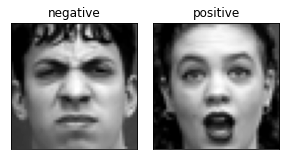

In [16]:
show_some_image(train_label_to_text, train_image_array, train_image_label)

In [17]:
# train_image_label

In [18]:
train_image_label_cat = np_utils.to_categorical(train_image_label)

In [19]:
train_image_label_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [20]:
train_image_array_resize = train_image_array/ 255.0

In [21]:
train_image_array_resize[0]

array([[[0.0745098 , 0.0745098 , 0.0745098 ],
        [0.08627451, 0.08627451, 0.08627451],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.04705882, 0.04705882, 0.04705882]],

       [[0.07058824, 0.07058824, 0.07058824],
        [0.07843137, 0.07843137, 0.07843137],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.06666667, 0.06666667, 0.06666667],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.06666667, 0.06666667, 0.06666667],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.07843137, 0

### Splitting the dataset for training and validation

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(train_image_array_resize, train_image_label_cat, stratify = train_image_label_cat, shuffle =True, test_size=0.2, random_state= 42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((710, 48, 48, 3), (178, 48, 48, 3), (710, 2), (178, 2))

In [23]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [24]:
print(img_width)
print(img_height)
print(img_depth)
print(num_classes)

48
48
3
2


In [25]:
def build_net(optim):
   
    net = Sequential()

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(MaxPooling2D(pool_size=(2,2)))
    net.add(Dropout(0.2))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(MaxPooling2D(pool_size=(2,2), ))
    net.add(Dropout(0.2))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(MaxPooling2D(pool_size=(2,2) ))
    net.add(Dropout(0.2))

    net.add(Flatten())
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(Dropout(0.2))
    
    net.add(
        Dense(
            num_classes,
            activation='sigmoid'
        )
    )
    
    net.compile(
        loss='binary_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [26]:

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=30,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [27]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [28]:
batch_size = 40 #batch size of 32 performs the best.
epochs = 60
optims = optimizers.Adam(0.001)

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Adam as it is more popular.
model = build_net(optims) 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

In [29]:
stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
print(short_model_summary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

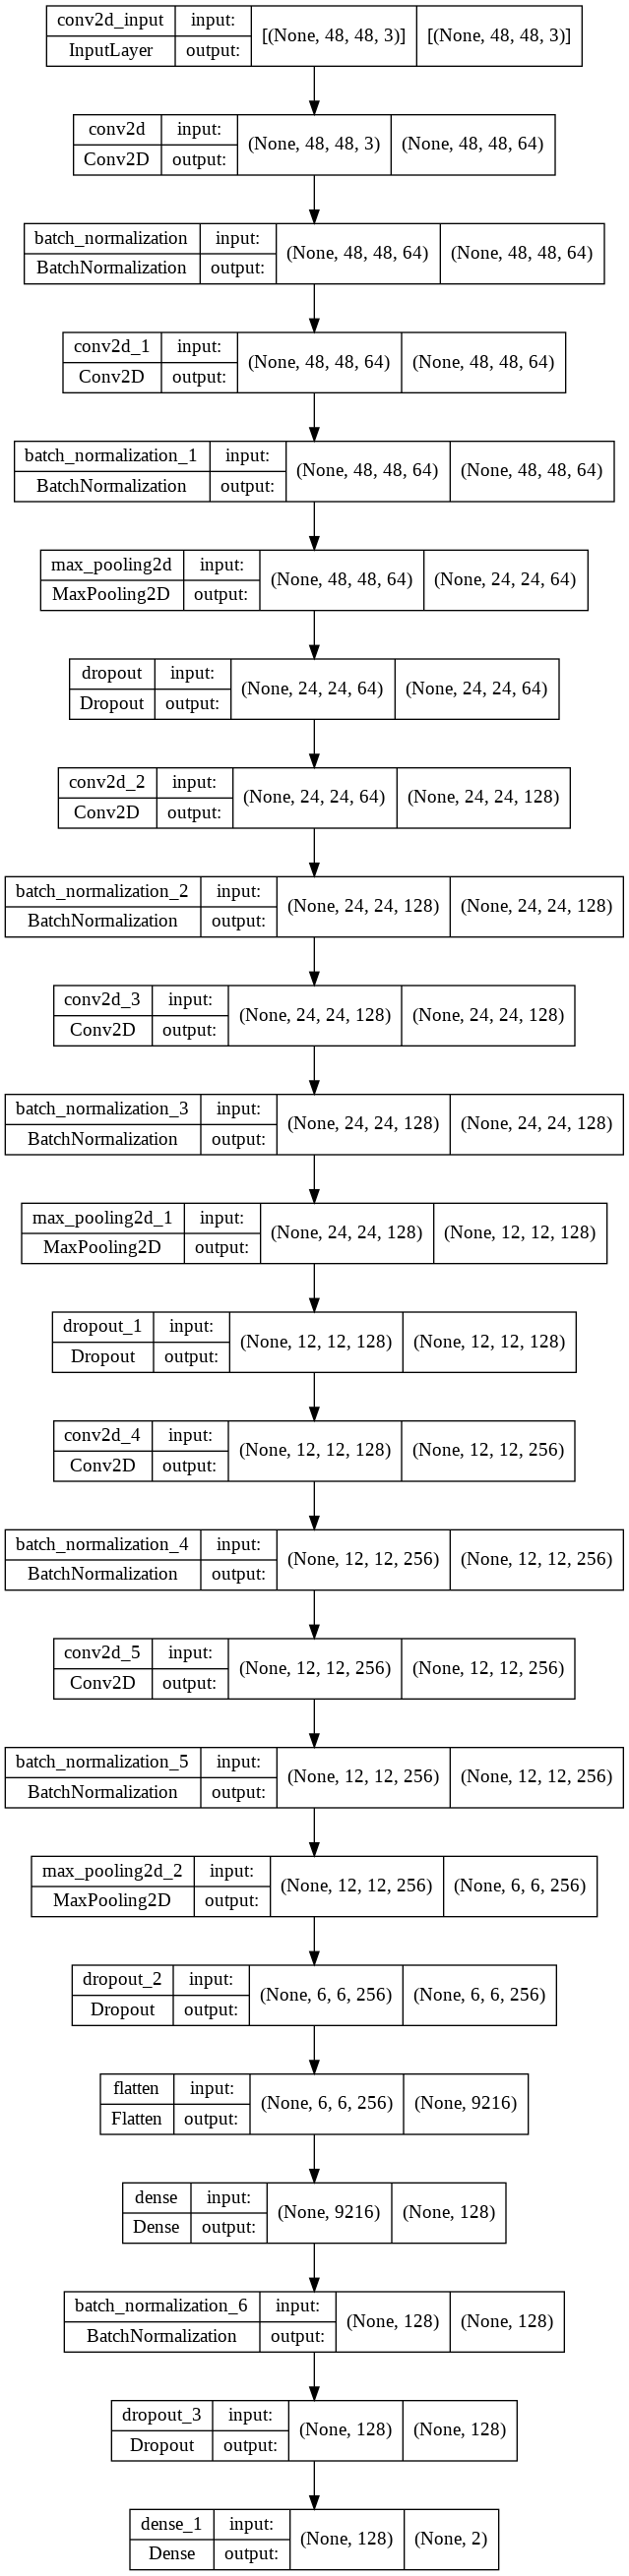

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


17/17 [==============================] - 15s 116ms/step - loss: 0.7236 - accuracy: 0.6662 - val_loss: 7.4895 - val_accuracy: 0.5169 - lr: 0.0010
Epoch 2/60
17/17 [==============================] - 1s 61ms/step - loss: 0.5137 - accuracy: 0.7775 - val_loss: 3.3522 - val_accuracy: 0.5730 - lr: 0.0010
Epoch 3/60
17/17 [==============================] - 1s 78ms/step - loss: 0.3936 - accuracy: 0.8225 - val_loss: 2.4322 - val_accuracy: 0.6067 - lr: 0.0010
Epoch 4/60
17/17 [==============================] - 1s 56ms/step - loss: 0.3195 - accuracy: 0.8690 - val_loss: 5.1012 - val_accuracy: 0.5730 - lr: 0.0010
Epoch 5/60
17/17 [==============================] - 1s 71ms/step - loss: 0.2935 - accuracy: 0.8662 - val_loss: 0.1901 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 6/60
17/17 [==============================] - 1s 59ms/step - loss: 0.2675 - accuracy: 0.8873 - val_loss: 0.1870 - val_accuracy: 0.9382 - lr: 0.0010
Epoch 7/60
17/17 [==============================] - 1s 69ms/step - loss: 0.2465 - acc

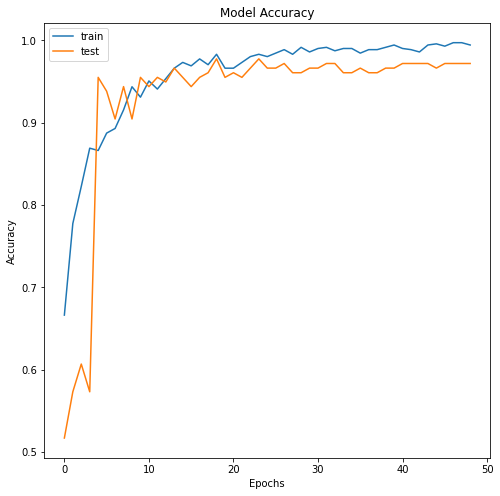

In [32]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("chart/ck/acc_ck_arr_class_7.png")
# plt.savefig("chart/ck/acc_ck_arr_class_7.eps",format='eps',bbox_inches='tight')
plt.show()

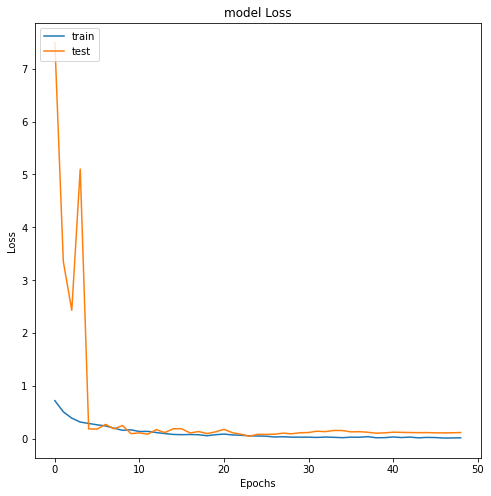

In [33]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
# pyplot.savefig("chart/ck/loss_ck_arr_class_7.png")
# pyplot.savefig("chart/ck/loss_ck_arr_class_7.eps",format='eps',bbox_inches='tight')
plt.show()


In [34]:
model.evaluate(X_train, y_train)

23/23 [==============================] - 0s 14ms/step - loss: 0.0284 - accuracy: 0.9887


[0.02842910960316658, 0.9887323975563049]

In [35]:
train_pred = model.predict(X_train)

In [36]:
np.argmax(train_pred[0])

1

In [37]:
# classifying the predicted categories
train_pred_conv = []
for i in train_pred:
    train_pred_conv.append(float(np.argmax(i)))

train_pred_conv

[1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0

In [38]:
train_pred_conv[2]

0.0

In [39]:
y_train[2]

array([1., 0.], dtype=float32)

In [40]:
y_train_conv = []
for i in y_train:
  y_train_conv.append(float(np.argmax(i)))

y_train_conv

[1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0

In [41]:
tf.math.confusion_matrix(y_train_conv, train_pred_conv)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[344,   1],
       [  7, 358]], dtype=int32)>

In [42]:
print(classification_report(y_train_conv, train_pred_conv))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       345
         1.0       1.00      0.98      0.99       365

    accuracy                           0.99       710
   macro avg       0.99      0.99      0.99       710
weighted avg       0.99      0.99      0.99       710



In [43]:
auc = roc_auc_score(y_train_conv, train_pred_conv)
print("auc score: ",auc)

auc score:  0.9889616835417908


In [44]:
valid_pred = model.predict(X_valid)

In [45]:
# classifying the predicted categories
valid_pred_conv = []
for i in valid_pred:
  valid_pred_conv.append(float(np.argmax(i)))

valid_pred_conv

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0

In [46]:
y_valid_conv = []
for i in y_valid:
  y_valid_conv.append(float(np.argmax(i)))

In [47]:
tf.math.confusion_matrix(y_valid_conv, valid_pred_conv)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[86,  0],
       [ 4, 88]], dtype=int32)>

In [48]:
print(classification_report(y_valid_conv, valid_pred_conv))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        86
         1.0       1.00      0.96      0.98        92

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



In [49]:
auc = roc_auc_score(y_valid_conv, valid_pred_conv)
print("auc score: ",auc)

auc score:  0.9782608695652174


In [50]:
test_path = '/content/test'

row, col = 48, 48
classes = 2

In [51]:
os.mkdir("test")
os.mkdir("test/negative")
os.mkdir("test/positive")

In [52]:
total_test_images=count_image(test_path)
total_test_images

negative has 20 number images
positive has 20 number images
Total number images is 40


40

In [53]:
test_image_array, test_image_label, test_label_to_text, img_label = image_to_array(total_test_images, test_path)


All images converted to array of negative directory
All images converted to array of positive directory


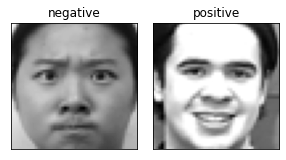

In [54]:
show_some_image(test_label_to_text, test_image_array, test_image_label)

In [55]:
len(test_image_label)

40

In [56]:
test_image_label_cat = np_utils.to_categorical(test_image_label)

In [57]:
test_image_array_resize = test_image_array/ 255.0

In [58]:
test_image_label_cat[0]

array([1., 0.], dtype=float32)

In [59]:
model.evaluate(test_image_array_resize, test_image_label_cat)

2/2 [==============================] - 0s 188ms/step - loss: 0.0584 - accuracy: 0.9750


[0.05837564542889595, 0.9750000238418579]

In [60]:
test_pred = model.predict(test_image_array_resize)

In [61]:
test_pred[0]

array([0.9986443 , 0.00154089], dtype=float32)

In [62]:
test_pred_conv = []
for i in test_pred:
  test_pred_conv.append(float(np.argmax(i)))

test_pred_conv

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [63]:
tf.math.confusion_matrix(test_image_label, test_pred_conv)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19,  1],
       [ 0, 20]], dtype=int32)>

In [64]:
print(classification_report(test_image_label, test_pred_conv))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [65]:
auc = roc_auc_score(test_image_label, test_pred_conv)
print("auc score: ",auc)

auc score:  0.975


Using Fer data 

In [66]:
test_path = '/content/test2'

row, col = 48, 48
classes = 2

In [67]:
os.mkdir("test2")
os.mkdir("test2/negative")
os.mkdir("test2/positive")

In [68]:
total_test_images=count_image(test_path)
total_test_images

negative has 84 number images
positive has 83 number images
Total number images is 167


167

In [69]:
test_image_array, test_image_label, test_label_to_text, img_label = image_to_array(total_test_images, test_path)


All images converted to array of negative directory
All images converted to array of positive directory


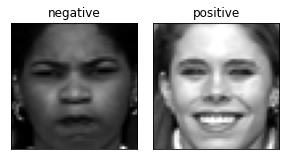

In [70]:
show_some_image(test_label_to_text, test_image_array, test_image_label)

In [71]:
len(test_image_label)

167

In [72]:
test_image_label_cat = np_utils.to_categorical(test_image_label)

In [73]:
test_image_array_resize = test_image_array/ 255.0

In [74]:
test_image_label_cat[0]

array([1., 0.], dtype=float32)

In [75]:
model.evaluate(test_image_array_resize, test_image_label_cat)

6/6 [==============================] - 0s 48ms/step - loss: 0.9027 - accuracy: 0.7545


[0.902657151222229, 0.7544910311698914]

In [76]:
test_pred = model.predict(test_image_array_resize)

In [77]:
test_pred[0]

array([9.9960619e-01, 3.8873186e-04], dtype=float32)

In [78]:
test_pred_conv = []
for i in test_pred:
  test_pred_conv.append(float(np.argmax(i)))

test_pred_conv

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0

In [79]:
tf.math.confusion_matrix(test_image_label, test_pred_conv)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[70, 14],
       [27, 56]], dtype=int32)>

In [80]:
print(classification_report(test_image_label, test_pred_conv))

              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77        84
         1.0       0.80      0.67      0.73        83

    accuracy                           0.75       167
   macro avg       0.76      0.75      0.75       167
weighted avg       0.76      0.75      0.75       167



In [81]:
auc = roc_auc_score(test_image_label, test_pred_conv)
print("auc score: ",auc)

auc score:  0.7540160642570282


### storing the model in json

In [83]:
os.mkdir("model")

In [84]:
from keras.models import model_from_json

# serialize model to json
json_model = model.to_json()

#save the model architecture to JSON file
with open('model/cnn_model3.json', 'w') as json_file:
    json_file.write(json_model)

#saving the weights of the model
model.save_weights('model/cnn_weights3.h5')

#Model loss and accuracy
loss,acc = model.evaluate(X_valid, y_valid, verbose=2)

6/6 - 0s - loss: 0.1021 - accuracy: 0.9775 - 76ms/epoch - 13ms/step
